# Exploratory Data Analysis

In this assignment we will work with data about the Titanic's passengers.

Objectives:
* to familiarize you with the seaborn library
* learn how to build different visualizations
* fill the gaps in the data
* encode categorical data

In [114]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Let's load the data.

In [115]:
df = pd.read_csv("titanic.csv")

### Task 1
Display the first 7 rows of the table and the table dimensions.

In [116]:
import pandas as pd

# Assuming df is your DataFrame
df = pd.read_csv('titanic.csv') 

# Display the first 7 rows of the DataFrame
print("First 7 rows of the DataFrame:")
print(df.head(7))

# Display the dimensions of the DataFrame
print("\nDimensions of the DataFrame:")
print(df.shape)

First 7 rows of the DataFrame:
   PassengerId  Survived  Pclass  \
0          1.0       0.0     3.0   
1          2.0       1.0     1.0   
2          3.0       1.0     3.0   
3          4.0       1.0     1.0   
4          5.0       0.0     3.0   
5          NaN       NaN     NaN   
6          7.0       0.0     1.0   

                                                Name     Sex   Age  SibSp  \
0                            Braund; Mr. Owen Harris    male  22.0    1.0   
1  Cumings; Mrs. John Bradley (Florence Briggs Th...  female  38.0    1.0   
2                             Heikkinen; Miss. Laina  female  26.0    0.0   
3       Futrelle; Mrs. Jacques Heath (Lily May Peel)  female  35.0    1.0   
4                           Allen; Mr. William Henry    male  35.0    0.0   
5                                                NaN     NaN   NaN    NaN   
6                            McCarthy; Mr. Timothy J    male  54.0    0.0   

   Parch            Ticket     Fare Cabin Embarked  
0    0.0  

# Feature Processing

1) Find columns that have missing values and process these missing values

2) Translate categorical features into numerical

### Task 2 
Output the basic numerical characteristics of the numerical columns. The method `.describe()` can be very usefull here.

In [117]:
import pandas as pd

# Assuming df is your DataFrame
df = pd.read_csv('titanic.csv') 

# Find numerical columns
num_cols = df.select_dtypes(include='number').columns

# Output the basic numerical characteristics of the numerical columns
print("Basic numerical characteristics of the numerical columns:")
print(df[num_cols].describe())

Basic numerical characteristics of the numerical columns:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   886.000000  886.000000  886.000000  711.000000  886.000000   
mean    448.316027    0.383747    2.305869   29.743094    0.523702   
std     256.211467    0.486572    0.837071   14.505873    1.105202   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     227.250000    0.000000    2.000000   20.750000    0.000000   
50%     448.500000    0.000000    3.000000   28.000000    0.000000   
75%     669.750000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  886.000000  886.000000  
mean     0.375847   32.279387  
std      0.791082   49.817969  
min      0.000000    0.000000  
25%      0.000000    7.903100  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


The function does not allow you to see if there are missing values in non-numeric columns.

## Process the 'Sex' column

### Task 3
Check if there are missing values in the column.

In [118]:
import pandas as pd

# Load the data into a pandas DataFrame
df = pd.read_csv('titanic.csv')

# Check if there are missing values in the 'Sex' column
missing_values = df['Sex'].isnull().sum()

# Print the number of missing values in the 'Sex' column
print(f'Number of missing values in the "Sex" column: {missing_values}')

# Replace missing values in the 'Sex' column with a default value 
df['Sex'].fillna('Unknown', inplace=True)

Number of missing values in the "Sex" column: 5


### Task 4
You should get 5 in the previous taks. It is a very small amount. Therefore, we can remove them completely from the dataset. Do it.

In [119]:
import pandas as pd

# Load the dataset
df = pd.read_csv('titanic.csv')

# Remove rows with missing values in the 'Sex' column
df = df.dropna(subset=['Sex'])

# Check if there are any missing values left in the 'Sex' column
print(df['Sex'].isnull().sum())

0


In [120]:
import pandas as pd

# Create a sample DataFrame with a 'Sex' column
df = pd.DataFrame({
    'Sex': ['male', 'female', 'male', 'male', 'female', 'female', 'male', 'male', 'female', 'female']
})

# Create a dictionary to map the categories to numbers
sex_dict = {'male': 0, 'female': 1}

# Apply the dictionary to the 'Sex' column
df['Sex'] = df['Sex'].map(sex_dict)

print(df)

   Sex
0    0
1    1
2    0
3    0
4    1
5    1
6    0
7    0
8    1
9    1


Let's see how gender affects survival rates.

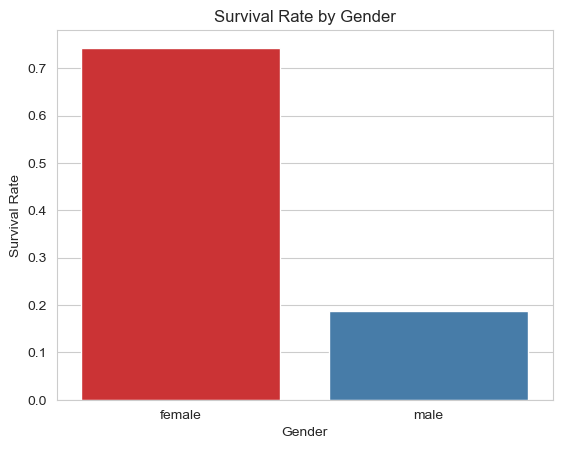

In [121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset into a DataFrame
titanic_data = pd.read_csv('titanic.csv')

# Calculate survival rates by gender
survival_by_gender = titanic_data.groupby('Sex')['Survived'].mean().reset_index()

# Plotting
sns.barplot(x='Sex', y='Survived', data=survival_by_gender, palette='Set1')
sns.set_style('whitegrid')  # Optional: Set the style of the plot
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()





Let's see how a person's gender and ticket class (Pclass) affect survival rates

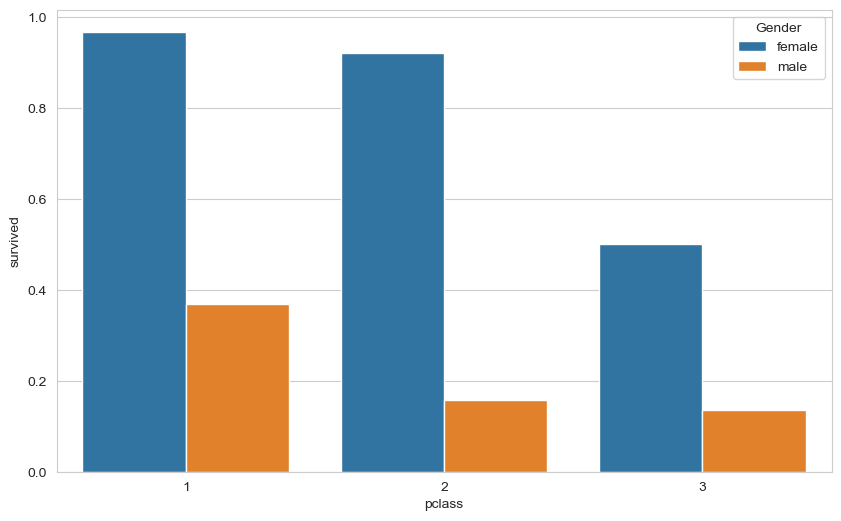

In [122]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset from seaborn
titanic_data = sns.load_dataset('titanic')

# Calculate survival rates
survival_rates = titanic_data.groupby(['sex', 'pclass'])['survived'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='pclass', y='survived', hue='sex', data=survival_rates)
plt.legend(title='Gender')
plt.show()


Another useful type of visualization is the box plot box. Let's look at a box plot that reflects the distribution of passengers by gender and age.

<Axes: xlabel='sex', ylabel='age'>

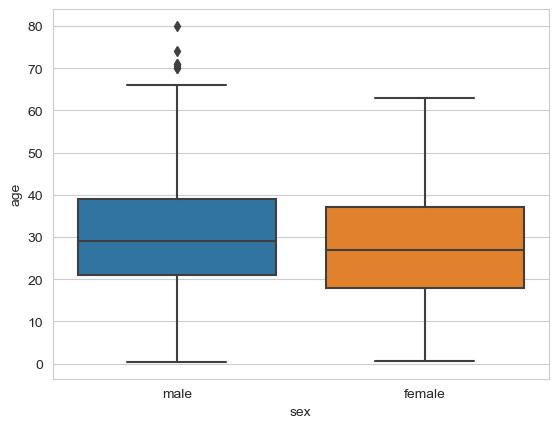

In [123]:
import seaborn as sns

# Load Titanic dataset from seaborn
titanic_data = sns.load_dataset('titanic')

# Plotting the box plot
sns.boxplot(x='sex', y='age', data=titanic_data)


We can detail the picture by adding Pclass separation.

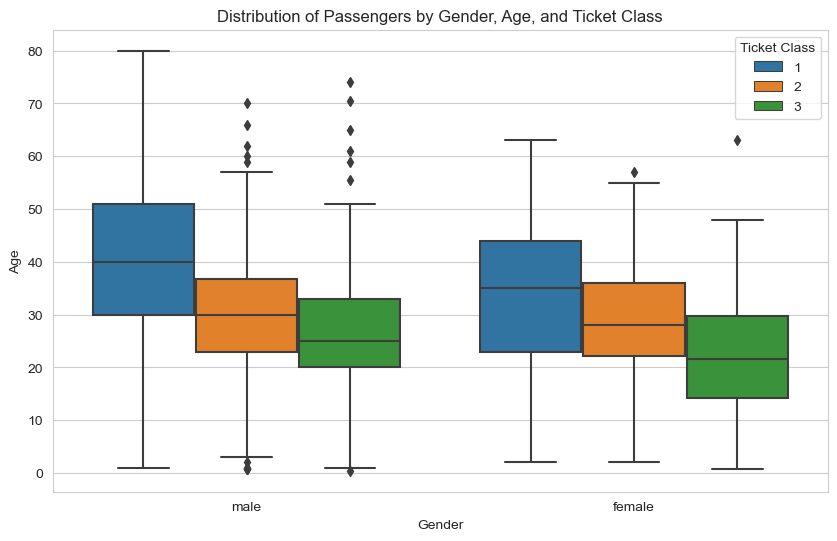

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset from seaborn
titanic_data = sns.load_dataset('titanic')

# Plotting the box plot with separation by ticket class (Pclass)
plt.figure(figsize=(10, 6))
sns.boxplot(x='sex', y='age', hue='pclass', data=titanic_data)
plt.title('Distribution of Passengers by Gender, Age, and Ticket Class')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.legend(title='Ticket Class')
plt.show()


## Process the 'Embarked' feature

In [125]:
import pandas as pd

# Load Titanic dataset into a DataFrame
titanic_data = pd.read_csv('titanic.csv')

# Check the value counts of the 'Embarked' column, including missing values
print(titanic_data['Embarked'].value_counts(dropna=False))
print(titanic_data.shape)


Embarked
S      641
C      168
Q       75
NaN      7
Name: count, dtype: int64
(891, 12)


### Task 6
Remove passengers from the table for whom the port of embarkation (Embarked) is unknown.

In [126]:
import pandas as pd

# Load the dataset
df = pd.read_csv('titanic.csv')

# Remove rows with missing values in the 'Embarked' column
df = df.dropna(subset=['Embarked'])

# Display the updated dataset
print(df.head())

   PassengerId  Survived  Pclass  \
0          1.0       0.0     3.0   
1          2.0       1.0     1.0   
2          3.0       1.0     3.0   
3          4.0       1.0     1.0   
4          5.0       0.0     3.0   

                                                Name     Sex   Age  SibSp  \
0                            Braund; Mr. Owen Harris    male  22.0    1.0   
1  Cumings; Mrs. John Bradley (Florence Briggs Th...  female  38.0    1.0   
2                             Heikkinen; Miss. Laina  female  26.0    0.0   
3       Futrelle; Mrs. Jacques Heath (Lily May Peel)  female  35.0    1.0   
4                           Allen; Mr. William Henry    male  35.0    0.0   

   Parch            Ticket     Fare Cabin Embarked  
0    0.0         A/5 21171   7.2500   NaN        S  
1    0.0          PC 17599  71.2833   C85        C  
2    0.0  STON/O2. 3101282   7.9250   NaN        S  
3    0.0            113803  53.1000  C123        S  
4    0.0            373450   8.0500   NaN        S  


Let's convert the categorical column to numeric columns using One-Hot Encoding, namely, create three numeric columns as follows:

In [127]:
# df['EmbS'] = df.apply(lambda row: 1 if row.Embarked == 'S' else 0, axis=1)
# df['EmbC'] = df.apply(lambda row: 1 if row.Embarked == 'C' else 0, axis=1)
# df['EmbQ'] = df.apply(lambda row: 1 if row.Embarked == 'Q' else 0, axis=1)

This operation can be done using the `get_dummies` method.

In [128]:
pd.get_dummies(df['Embarked'])

,C,Q,S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
886,False,False,True
887,False,False,True
888,False,False,True
889,True,False,False


### Task 7
Remove the categorical column `Embarked` from the table and add new columns to it, obtained using `get_dummies`.

In [129]:
import pandas as pd

# Check if the 'Embarked' column exists in the DataFrame
if 'Embarked' in df.columns:
    # Add new columns to the DataFrame using get_dummies
    df_dummies = pd.get_dummies(df['Embarked'].fillna('Unknown'), prefix='Embarked')

    # Remove the 'Embarked' column
    df = df.drop('Embarked', axis=1)

    # Concatenate the original DataFrame with the new columns
    df = pd.concat([df, df_dummies], axis=1)

print(df)

     PassengerId  Survived  Pclass  \
0            1.0       0.0     3.0   
1            2.0       1.0     1.0   
2            3.0       1.0     3.0   
3            4.0       1.0     1.0   
4            5.0       0.0     3.0   
..           ...       ...     ...   
886        887.0       0.0     2.0   
887        888.0       1.0     1.0   
888        889.0       0.0     3.0   
889        890.0       1.0     1.0   
890        891.0       0.0     3.0   

                                                  Name     Sex   Age  SibSp  \
0                              Braund; Mr. Owen Harris    male  22.0    1.0   
1    Cumings; Mrs. John Bradley (Florence Briggs Th...  female  38.0    1.0   
2                               Heikkinen; Miss. Laina  female  26.0    0.0   
3         Futrelle; Mrs. Jacques Heath (Lily May Peel)  female  35.0    1.0   
4                             Allen; Mr. William Henry    male  35.0    0.0   
..                                                 ...     ...   ... 

## Process the 'Age' feature

Check if `Age` has any missing values.

In [130]:
df.Age.isna().sum()

175

Let's fill in the blanks with the median `Age` value.

In [131]:
median_age = df['Age'].median()

df['Age'].fillna(median_age, inplace=True)

Let's plot the age distribution of the passengers.

/var/folders/ds/8r6r7x_x5lg1lsn9dq6wm5pm0000gn/T/ipykernel_66867/755151933.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], kde=False)


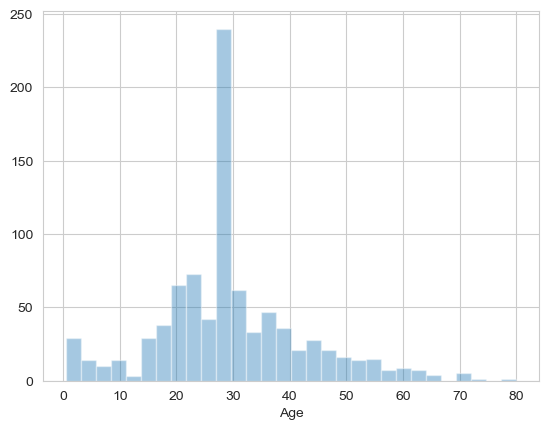

In [132]:
sns.distplot(df['Age'], kde=False)
plt.show()

We can also look at the age distribution of `Pclass`.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


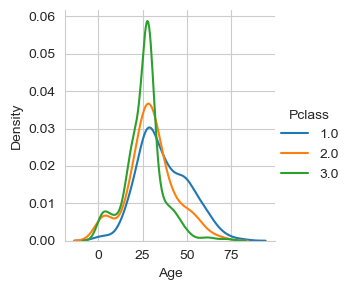

In [133]:
import seaborn as sns

facet = sns.FacetGrid(data=df, hue="Pclass", legend_out=True)
facet = facet.map(sns.kdeplot, "Age")
facet.add_legend();



### Process the 'Fare' feature

1) Check if there are any missing values in `Fare`

2) If there are missing values, fill them with the _median_ value of `Fare`

In [134]:
import pandas as pd

# Load the dataset
df = pd.read_csv('titanic.csv')

# Calculate the median value of Fare
median_fare = df['Fare'].median()

# Fill missing values in Fare with the median value
df['Fare'] = df['Fare'].fillna(median_fare)

### Process the 'Pclass' feature

Are there any missing values in `Pclass`?

In [135]:
df['Pclass'].value_counts(dropna=False)

Pclass
3.0    487
1.0    216
2.0    183
NaN      5
Name: count, dtype: int64

### Task 8
Draw a histogram of survival rates as a function of `Pclass`.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


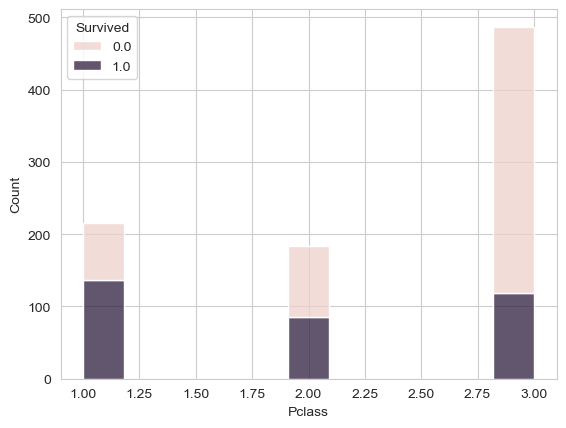

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(x='Pclass', hue='Survived', data=df, multiple='stack')
plt.show()

### Process the feature 'SibSp' (number of siblings, husbands, wives)

Are there any missing values in `SibSp`?

In [137]:
import pandas as pd

df = pd.read_csv('titanic.csv')

# Check if there are any missing values in the 'SibSp' column
sibsp_missing = df['SibSp'].isnull().sum()

# Print the number of missing values in the 'SibSp' column
print(f'Number of missing values in the "SibSp" column: {sibsp_missing}')

median_sibsp = df['SibSp'].median()
df['SibSp'] = df['SibSp'].fillna(median_sibsp) 

Number of missing values in the "SibSp" column: 5


### Task 9
The `PassengerId` column is categorical and does not carry important information, delete it.

In [138]:
df = df.drop('PassengerId', axis=1)